In [75]:
from statsbombpy import sb
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from data_pre import get_df, data_prep, one_hot, evaluation
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Suppress all warnings
warnings.filterwarnings("ignore")

In [70]:
 #Import Data from statsbombpy
competitions = sb.competitions()
fifa_2022 = sb.matches(competition_id=43, season_id=106)

#Grouped events
events_fifa = sb.competition_events(
    country="International",
    division='FIFA World Cup',
    season="2022",
    gender="male"
)


In [84]:
risk_df = get_df(events_fifa)

In [85]:
risk_df = data_prep(risk_df)
risk_df = one_hot(risk_df)

Number of risky passes: 10,952
Number of NOT risky passes: 894.0
Number of NOT risky passes: 108.0


In [86]:
# Splitting the data into features (X) and target variable (y)
X = risk_df.iloc[:, 1:]
y = risk_df.iloc[:, 0]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting the data into validation test set
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Bagging

In [9]:
# Bagging Classifier
bagging_classifier = BaggingClassifier(random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

print("Bagging Classifier Accuracy:", bagging_accuracy)

Bagging Classifier Accuracy: 0.854690897794346


In [10]:
# Define the parameter grid for grid search
param_grid_bag = {
    'n_estimators': [500,750],
    'max_features': [4,6],
    'max_samples': [6,8],
}


In [11]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid_bag, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=42),
             param_grid={'max_features': [4, 6], 'max_samples': [6, 8],
                         'n_estimators': [500, 750]},
             scoring='accuracy')

In [12]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_features': 6, 'max_samples': 8, 'n_estimators': 750}


In [13]:
# Get the best model
best_bg_model = grid_search.best_estimator_

# Make predictions on the test set
bg_predictions = best_bg_model.predict(X_test)

# Evaluate the model performance
bg_accuracy = accuracy_score(y_test, bg_predictions)
print("Bagging Classifier Accuracy:", bg_accuracy)

Bagging Classifier Accuracy: 0.8291783162472818


Random Forests

In [87]:
# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

print("Random Forest Classifier Accuracy:", random_forest_accuracy)

Random Forest Classifier Accuracy: 0.8589624106865487


In [37]:
# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [500, 850, 1200, 1500, 1800],
    'max_features': [3, 4, 5],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [1, 3, 5],
}

In [38]:
# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(bootstrap=False, max_depth=8,
                                              min_samples_split=6,
                                              n_estimators=1500,
                                              random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8], 'max_features': [3, 4, 5],
                         'min_samples_split': [1, 3, 5]},
             scoring='accuracy')

In [39]:
# Print the best hyperparameters
print("Random Forest Best Hyperparameters:", grid_search_rf.best_params_)

Random Forest Best Hyperparameters: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5}


In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42,
                                                max_depth= 8,
                                                max_features= 3,
                                                min_samples_split = 5,
                                                n_estimators = 1250)
random_forest_classifier = random_forest_classifier.fit(X_train, y_train)

In [51]:
#Graph for accuracy for different tree numbers
accuracy_rf = []
n_estimators = [500, 650, 850, 1000, 1250, 1500, 1800]
replacement_val = [True, False]
criterion_val = ['gini', 'entropy', 'log_loss']

for i in range(len(n_estimators)):
    random_forest_classifier = RandomForestClassifier(random_state=42,
                                                        max_depth= 8,
                                                        max_features= 3,
                                                        min_samples_split = 5,
                                                        n_estimators = n_estimators[i],
                                                        )
    random_forest_classifier = random_forest_classifier.fit(X_train, y_train)

    rf_predictions = random_forest_classifier.predict(X_test)

    # Evaluate the model performance
    rf_accuracy = accuracy_score(y_test, rf_predictions)*100

    accuracy_rf.append(rf_accuracy)

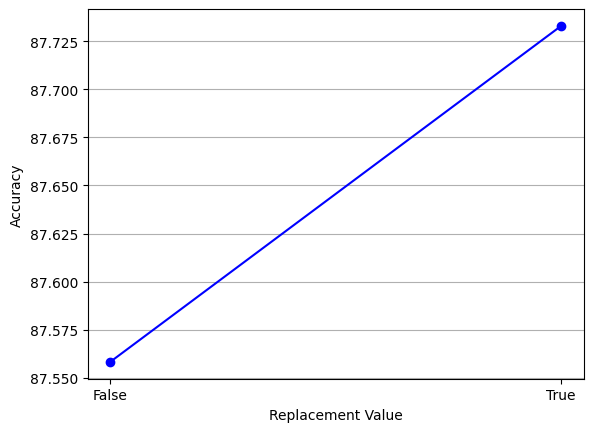

In [ ]:
# Plot the line graph
plt.plot(n_estimators, accuracy_rf, color='blue', marker='o')
plt.xlabel('Replacement Value')
plt.ylabel('Accuracy')
plt.xticks(replacement_val, ['True', 'False'])
plt.grid(axis='y')  # Remove vertical grid lines

#plt.savefig(f'rf_number_trees.png', bbox_inches='tight')

In [48]:
#IF GridSearch did not run
#rf_predictions = random_forest_classifier.predict(X_test)

In [40]:
# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
rf_predictions = best_rf_model.predict(X_test)

In [49]:
# Evaluate the model performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy*100)

Random Forest Classifier Accuracy: 87.72134203168686


Evaluation Measures

In [86]:
eval_bg = evaluation(y_test, bg_predictions)

eval_rf = evaluation(y_test, rf_predictions)

Validation Test

In [54]:
# Merge 60% x_train with 20% x_train and similar for Y
x_train_val_final = pd.concat([X_train, X_train_val], ignore_index=True)

y_train_val_final = pd.concat([y_train, y_train_val], ignore_index=True)

In [64]:
random_forest_classifier = RandomForestClassifier(random_state=42,
                                                max_depth= 8,
                                                max_features= 3,
                                                min_samples_split = 5,
                                                n_estimators = 1500)

random_forest_classifier = random_forest_classifier.fit(x_train_val_final, y_train_val_final)


# Make predictions on the test set
rf_predictions_val = random_forest_classifier.predict(X_test_val)

# Evaluate the model performance
rf_accuracy_val = accuracy_score(y_test_val, rf_predictions_val)
print("Random Forest Classifier Accuracy in Validation Test:", rf_accuracy_val*100)

Random Forest Classifier Accuracy in Validation Test: 87.67474370922646


In [65]:
eval_rf = evaluation(y_test_val, rf_predictions_val)

Importance scores

In [96]:
#Random Forests
# Access variable importance scores
importance_scores = random_forest_classifier.feature_importances_

# Display variable importance scores
for i, score in enumerate(importance_scores):
    print(f"Feature {i + 1}: Importance Score = {score:.4f}")

Feature 1: Importance Score = 0.4057
Feature 2: Importance Score = 0.3595
Feature 3: Importance Score = 0.1379
Feature 4: Importance Score = 0.0723
Feature 5: Importance Score = 0.0142
Feature 6: Importance Score = 0.0049
Feature 7: Importance Score = 0.0030
Feature 8: Importance Score = 0.0025


Text(0, 0.5, 'Variables')

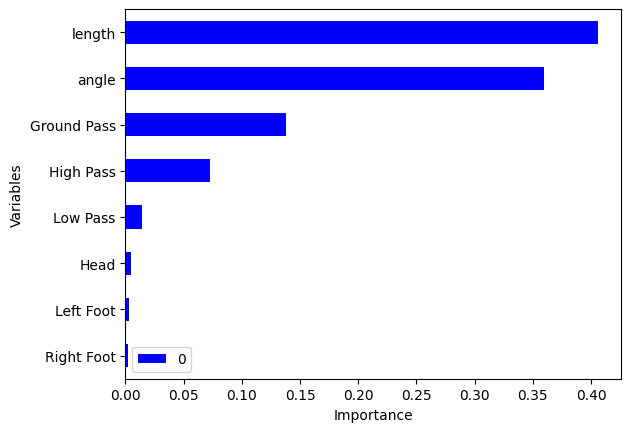

In [108]:
global_importances = pd.Series(random_forest_classifier.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)

# Remove specified prefixes from column names
global_importances = global_importances.to_frame()
global_importances.index = global_importances.index.str.replace('pass_body_part_', '').str.replace('pass_height_', '').str.replace('pass_', '')

global_importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Variables")